<a href="https://colab.research.google.com/github/Sylvariane/Prediction_crise_cardiaque/blob/master/Pr%C3%A9dictions_crises_cardiaques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédictions des crises cardiaques

Les maladies cardiaques sont les premières causes de décès dans le monde. Beaucoup de facteurs vont être à l'origine des maladies cardiaques.

Dans un premier temps, une analyse exploratoire des données va être effectuée. Ensuite, à l'aide de méthode de Machine Learning, un modèle de prédiction va être créer. 

## 0. Préparation de l'environnement de travail

In [ ]:
# connexion à Google Drive pour importer le fichier
from google.colab import drive
drive.mount('/content/drive')
dir= '/content/drive/My Drive/Formation Data Analyst/Projets personnels/Heart Failure Predictions/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set_palette("Set2")

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Projets personnels/Heart Failure Predictions/heart_failure_clinical_records_dataset.csv')

## 1. Analyse exploratoire des données 

La première étape consiste à prendre connaissance de la composition de notre jeu de données. 

In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print(dataset.shape)
print(dataset.columns)

(299, 13)
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
columns = ('age', 'anémie', 'créatine kinase', 'diabète', 'fraction d\'éjection', 'hypertension', 'plaquettes', 'créatine', 'sodium', 'sexe', 'fumeur', 'suivi', 'décès')
dataset.columns = columns
print(dataset.columns)

Index(['age', 'anémie', 'créatine kinase', 'diabète', 'fraction d'éjection',
       'hypertension', 'plaquettes', 'créatine', 'sodium', 'sexe', 'fumeur',
       'suivi', 'décès'],
      dtype='object')


In [ ]:
s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorial columns :', object_cols)

Categorial columns : []


Notre jeu de données est composé de 299 lignes et 13 colonnes. Chaque ligne représente un patient et chaque colonne une caractéristique du patient. Parmi ces caractéristiques, on retrouve son âge, le fait de présenter une anémie, le taux de créatine kinase, le fait d'être diabétique, le pourcentage d'éjection du sang lors d'un battement cardiaque, le fait de souffrir d'hypertension artérielle, le nombre de plaquettes, le taux de créatinine, le taux de sodium, le sexe du patient, le fait de fumer ou non, le nombre de jours de surveillance et le décès.

On possède des données catégorielles (diabète, hypertension, etc.) mais les transformations ont déjà été effectuées. La prochaine étape de notre étude va être le nettoyage des données.

### 1.1. Nettoyage des données

On débute le nettoyage des données par la recherche de données manquantes.

In [ ]:
dataset.isnull().sum()

age                    0
anémie                 0
créatine kinase        0
diabète                0
fraction d'éjection    0
hypertension           0
plaquettes             0
créatine               0
sodium                 0
sexe                   0
fumeur                 0
suivi                  0
décès                  0
dtype: int64

Notre jeu de données ne présente pas de données manquantes. On va ensuite s'intéresser aux données dupliquées.

In [ ]:
dataset.duplicated().sum()

0

Notre jeu de données ne présente pas de données dupliquées. On peut donc passer à l'analyse exploratoire de nos données.

### 1.2. Analyses descriptives de nos données

On va commencer par s'intéresser aux statistiques basiques de notre jeu de données pour le décrire.

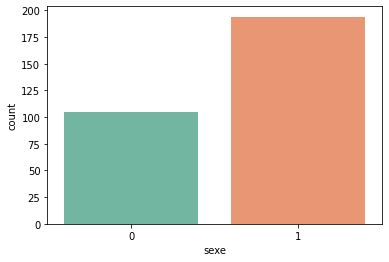

In [ ]:
_ = sns.countplot('sexe', data=dataset)
_ = plt.show()

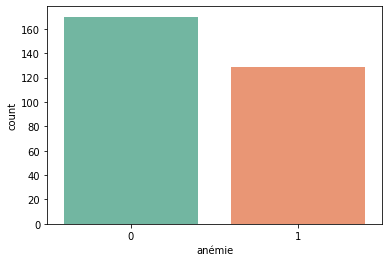

In [ ]:
_ = sns.countplot('anémie', data=dataset)
_ = plt.show()

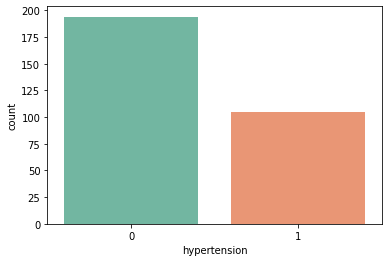

In [ ]:
_ = sns.countplot('hypertension', data=dataset)
_ = plt.show()

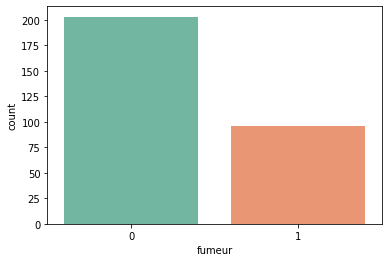

In [ ]:
_ = sns.countplot('fumeur', data=dataset)
_ = plt.show()

### 1.3. Analyses bivariées

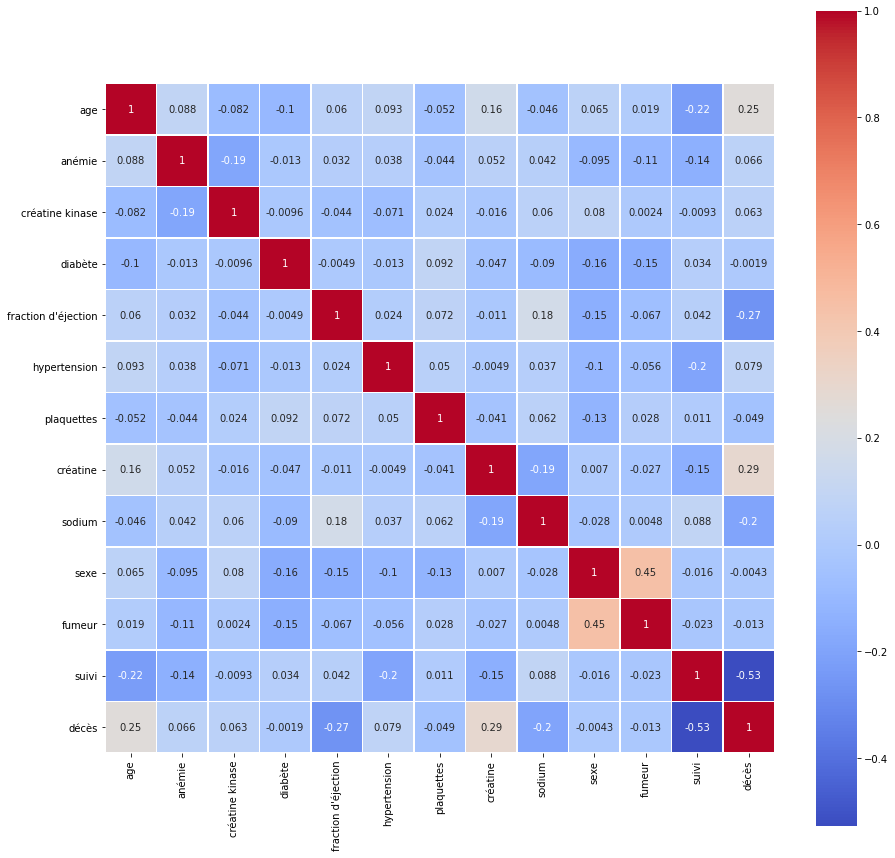

In [ ]:
corrMatrix = dataset.corr()
plt.figure(figsize=(15,15))
_ = sns.heatmap(corrMatrix,square = True, cmap="coolwarm",linewidths=.5, annot=True)
_ = plt.show()

## 2. Modélisation et Machine Learning

In [ ]:
X = dataset[['age', 'fraction d\'éjection','créatine', 'sodium', 'suivi']]
y = dataset['décès']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=1)

### 2.1. Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  90.0 %


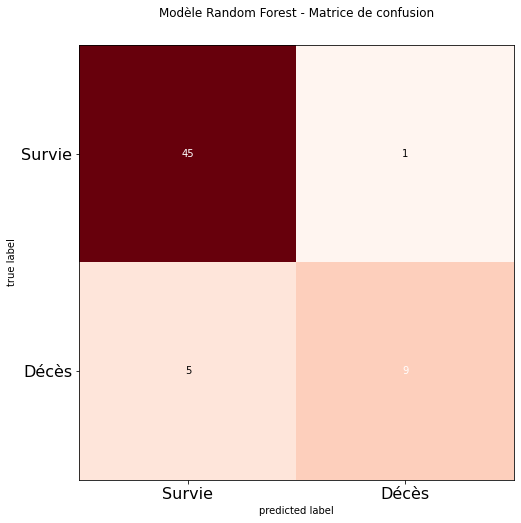

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
_ = plt.title("Modèle Random Forest - Matrice de confusion")
_ = plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
_ = plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
_ = plt.show()

### 2.2. Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=1)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  88.33333333333333 %


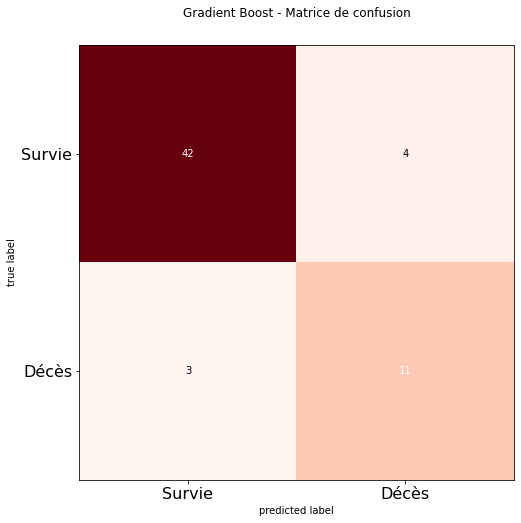

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("Gradient Boost - Matrice de confusion")
plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
plt.show()

### 2.3. AdaBoost

In [ ]:
adc = AdaBoostClassifier(n_estimators=100, random_state=1)
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)

print('Taux de précision : ', metrics.accuracy_score(y_pred=y_pred,y_true=y_test) * 100, '%')

Taux de précision :  88.33333333333333 %


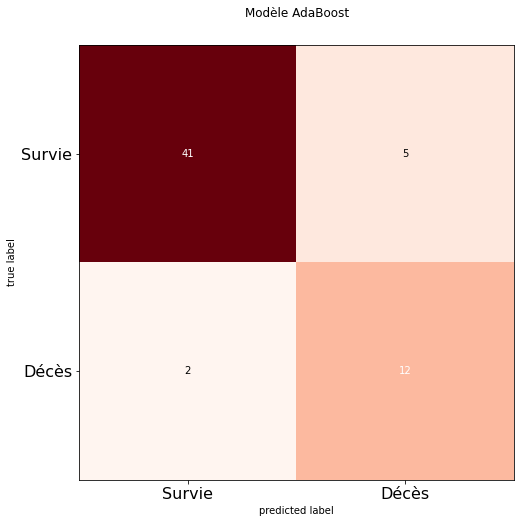

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("Modèle AdaBoost")
plt.xticks(range(2), ["Survie","Décès"], fontsize=16)
plt.yticks(range(2), ["Survie","Décès"], fontsize=16)
plt.show()

Parmi nos 3 modèles de classification, la méthode de la random forest est celui qui obtient un plus haut pourcentage de précision (90%). Les autres modèles obtiennent de bons pourcentage de précision. Cependant la méthode de la random forest est celle qui produit le moins de faux négatif.

Sources : 
- https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records
- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001
- https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
- https://www.fedecardio.org/Les-gestes-qui-sauvent/L-arret-cardiaque/larret-cardiaque-un-bilan-alarmant
- https://www.who.int/fr/news-room/fact-sheets/detail/the-top-10-causes-of-death
